In [67]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [68]:
# 훈련된 결정트리 시각화 
from sklearn.tree import export_graphviz


export_graphviz(
    tree_clf,
    out_file="./images/Decision_tree/iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)


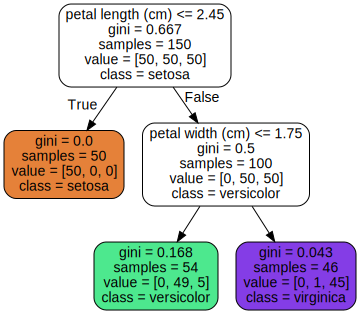

In [69]:
# 위에서 생성한 .dot 파일을 .png파일로 변환하는 명렬어
# 터미널에서 사용
# dot -Tpng ./images/Decision_tree/iris_tree.dot -o ./images/Decision_tree/iris_tree.png

import os
from graphviz import Source 
Source.from_file(os.path.join("./images/Decision_tree/", "iris_tree.dot"))

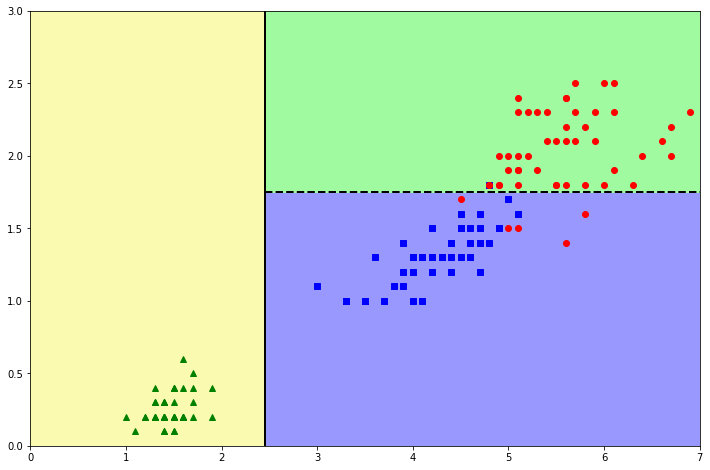

In [70]:
# 그래프 표현

plt.figure(figsize = (12, 8))
plt.plot(X[y==0, 0], X[y==0, 1], "g^") 
plt.plot(X[y==1, 0],X[y==1, 1], "bs")
plt.plot(X[y==2, 0],X[y==2, 1], "ro")

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2) # 첫번째 검사
plt.plot([2.45, 7], [1.75, 1.75], "k--", linewidth=2) # 두번째 검사
# plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2) # 첫번째 검사
plt.axis([0, 7, 0, 3])



import matplotlib.pyplot as plt
import numpy as np

x0, x1 = np.meshgrid(
    np.linspace(0, 7, 400).reshape(-1, 1),
    np.linspace(0, 3, 300).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = tree_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_map)



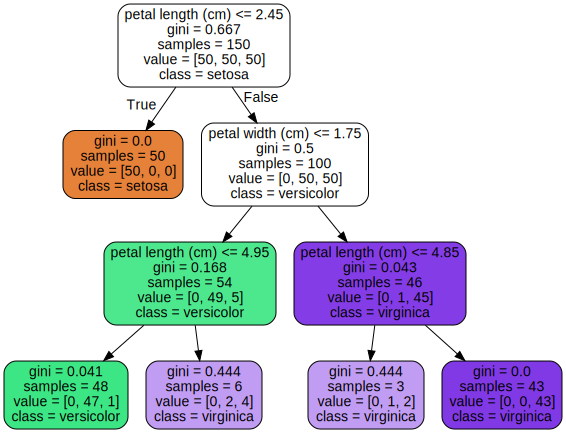

In [71]:
# 깊이를 3으로 설정

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

export_graphviz(
    tree_clf,
    out_file="./images/Decision_tree/iris_tree_plus.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join("./images/Decision_tree/", "iris_tree_plus.dot"))

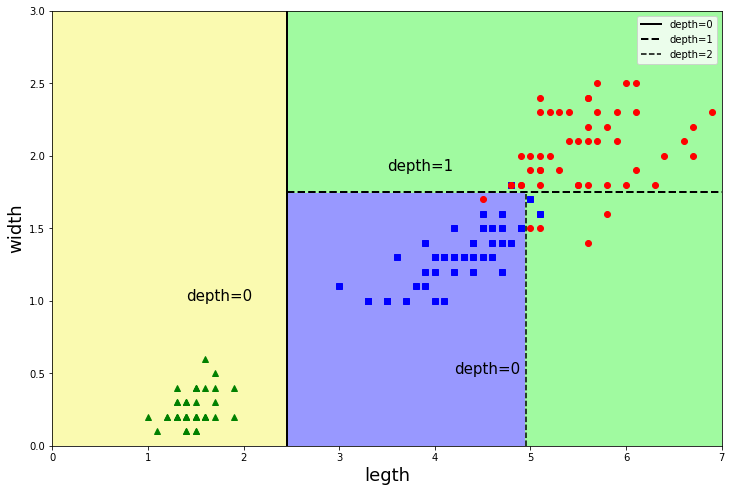

In [73]:
# 그래프 표현

plt.figure(figsize = (12, 8))
plt.plot(X[y==0, 0], X[y==0, 1], "g^") 
plt.plot(X[y==1, 0],X[y==1, 1], "bs")
plt.plot(X[y==2, 0],X[y==2, 1], "ro")

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2, label="depth=0") # 첫번째 검사
plt.plot([2.45, 7], [1.75, 1.75], "k--", linewidth=2, label="depth=1") # 두번째 검사
plt.plot([4.95, 4.95], [0, 1.75], "k--", label="depth=2") # 세번째 검사
plt.xlabel("legth", fontsize=18)
plt.ylabel("width", fontsize=18)
plt.text(1.4, 1.0, "depth=0", fontsize=15)
plt.text(3.5, 1.9, "depth=1", fontsize=15)
plt.text(4.2, 0.5, "depth=0", fontsize=15)
plt.legend()
plt.axis([0, 7, 0, 3])



import matplotlib.pyplot as plt
import numpy as np

x0, x1 = np.meshgrid(
    np.linspace(0, 7, 400).reshape(-1, 1),
    np.linspace(0, 3, 300).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = tree_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_map)


In [74]:
# 결정트리의 확률 측정
# 해당샘플의 길이와 너비에 해당하는 리프노드에서 가장 큰 확률을 가진 클래스로 판단

tree_clf.predict_proba([[5, 1.5]])
# 클래스에 대한 확률
# 0, 1, 2

array([[0.        , 0.33333333, 0.66666667]])

In [75]:
tree_clf.predict([[5, 1.5]])
# 확률이 가장 높은 클래스 2를 선택

array([2])

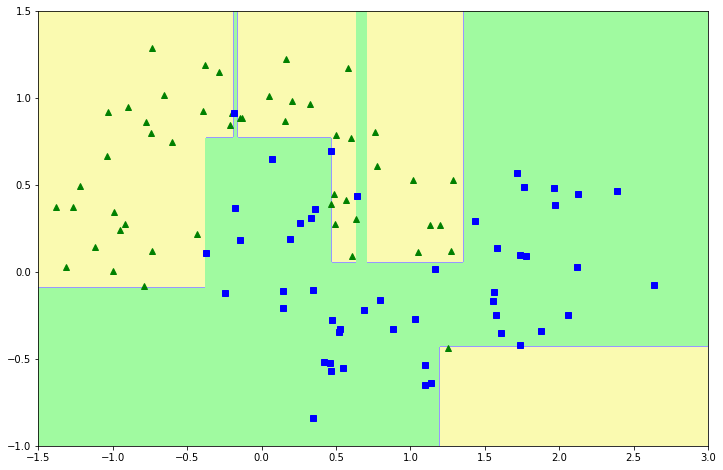

In [76]:
# 과대 적합을 막기위한 결정트리 규제
# 1. 규제 없음

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=53) # 데이터 만들기



tree_clf = DecisionTreeClassifier(random_state=42) # 규제없이 생성
tree_clf.fit(X, y)


plt.figure(figsize = (12, 8))
plt.plot(X[y==0, 0], X[y==0, 1], "g^") 
plt.plot(X[y==1, 0],X[y==1, 1], "bs")


x0, x1 = np.meshgrid(
    np.linspace(-1.5, 3, 400).reshape(-1, 1),
    np.linspace(-1, 1.5, 300).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = tree_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_map)

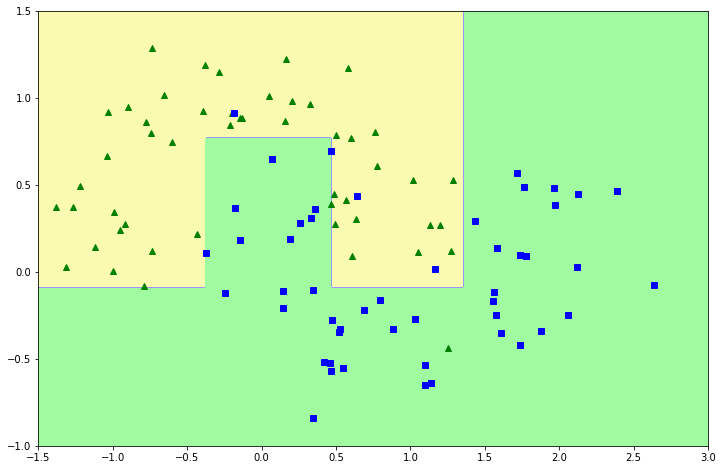

In [77]:
# 과대 적합을 막기위한 결정트리 규제
# 2. 규제 -> min_samples_leaf = 4

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=53) # 데이터 만들기



tree_clf = DecisionTreeClassifier(min_samples_leaf = 4, random_state=42) # 규제 적용
tree_clf.fit(X, y)


plt.figure(figsize = (12, 8))
plt.plot(X[y==0, 0], X[y==0, 1], "g^") 
plt.plot(X[y==1, 0],X[y==1, 1], "bs")


x0, x1 = np.meshgrid(
    np.linspace(-1.5, 3, 400).reshape(-1, 1),
    np.linspace(-1, 1.5, 300).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = tree_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_map)

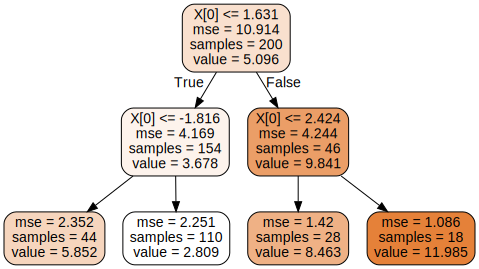

In [91]:
# 결정트리로 회귀


# 데이터
np.random.seed(42)
m = 200
X = 6*np.random.rand(m, 1) - 3
y = X**2 + X + 2 + np.random.randn(m ,1)



# 훈련
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)


# 결정 이미지
export_graphviz(
    tree_reg,
    out_file="./images/Decision_tree/iris_tree_regressor.dot",
    rounded=True,
    filled=True
)

Source.from_file(os.path.join("./images/Decision_tree/", "iris_tree_regressor.dot"))

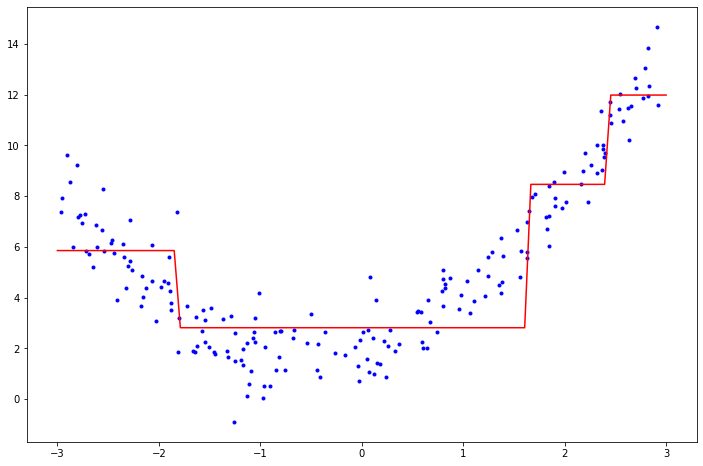

In [97]:
# max_depth=2 그래프 표현
# 예측은 깊이에 따른 묶음의 평균값을 예측으로 활용
# 예를들어, x가 -3~2는 6으로 예측

X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = tree_reg.predict(X_new)

plt.figure(figsize=(12, 8))
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")


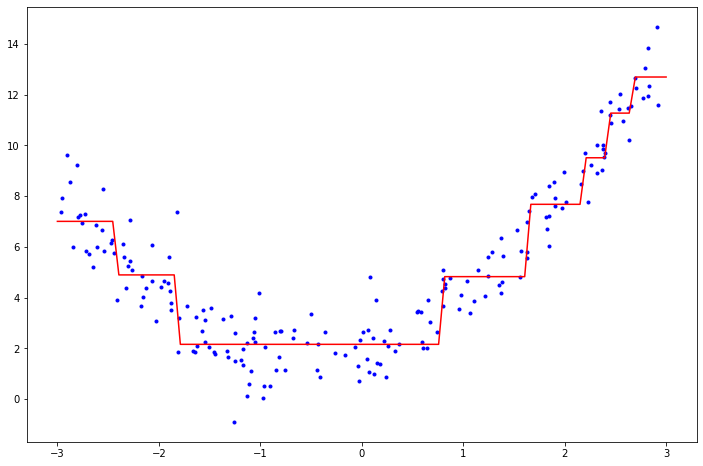

In [98]:
# max_depth=3으로 예측
tree_reg3 = DecisionTreeRegressor(max_depth=3)
tree_reg3.fit(X, y)

X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = tree_reg3.predict(X_new)

plt.figure(figsize=(12, 8))
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")

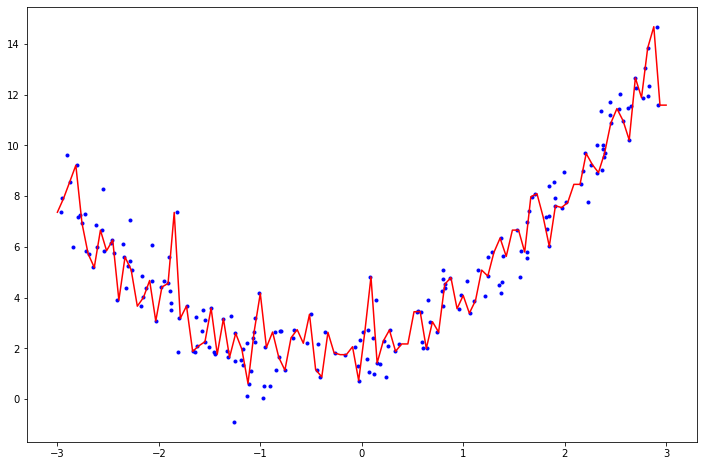

In [99]:
# 규제없이 예측
tree_reg4 = DecisionTreeRegressor(random_state=42)
tree_reg4.fit(X, y)

X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = tree_reg4.predict(X_new)

plt.figure(figsize=(12, 8))
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")

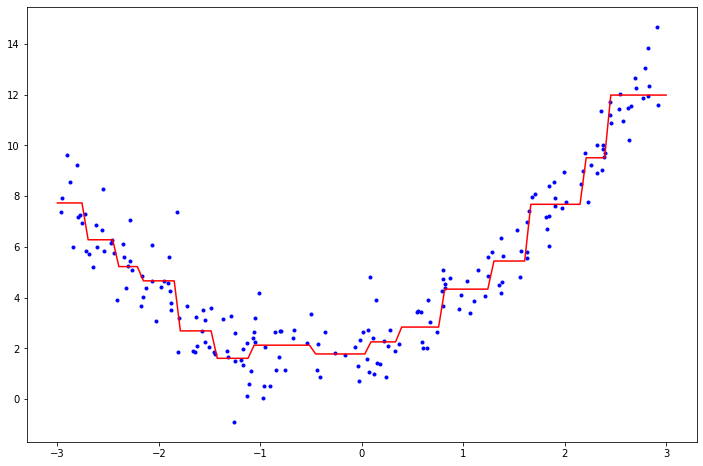

In [100]:
# min_samples_leaf = 10 으로 예측
tree_reg3 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg3.fit(X, y)

X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = tree_reg3.predict(X_new)

plt.figure(figsize=(12, 8))
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")